### Problem Statement

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population  often taken advantage of by untrustworthy lenders.Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they re challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.



### BaseData Set Creation

In [145]:
import matplotlib.pyplot as plt

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv(r'C:\Users\kiran\Downloads\application_train.csv\application_train.csv')

In [147]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
df=df.sample(10000)

### Memory Optimization

In [149]:
""" iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.        
"""
start_mem = df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

for col in df.describe().columns:
    col_type = df[col].dtype

    if col_type != object:
        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)  
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
    else:
        df[col] = df[col].astype('category')

end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))   

Memory usage of dataframe is 9.38 MB
Memory usage after optimization is: 3.08 MB
Decreased by 67.2%


### Null Value Treatment

In [150]:
def null_values(base_dataset):
    print(base_dataset.isna().sum())
    ## null value percentage     
    null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100
    #null value percentage beyond threshold drop , else treat the columns 
    
    retained_columns=null_value_table[null_value_table<int(input())].index
    # if any variable as null value greater than input(like 30% of the data) value than those variable are consider as drop
    drop_columns=null_value_table[null_value_table>int(input())].index
    base_dataset.drop(drop_columns,axis=1,inplace=True)
    len(base_dataset.isna().sum().index)
    cont=base_dataset.describe().columns
    cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
    print(base_dataset.isna().sum())
    return base_dataset,cat,cont

In [151]:
 base_dataset,cat,cont=null_values(df)

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                 11
NAME_TYPE_SUITE                 40
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
OWN_CAR_AGE                   6558
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE     

In [152]:
base_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
72537,184117,0,Revolving loans,F,N,Y,0,144000.0,292500.0,14625.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
269614,412457,0,Cash loans,M,N,Y,0,112500.0,253377.0,12933.0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
279657,423991,0,Cash loans,M,Y,Y,0,180000.0,276277.5,18261.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
110841,228588,0,Cash loans,F,N,Y,0,148500.0,450000.0,31320.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
57300,166411,0,Cash loans,F,Y,Y,0,252000.0,1139845.5,45202.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,9.0


### Label Encoders

In [153]:
from sklearn.preprocessing import LabelEncoder
def label_encoders(data,cat):
    le=LabelEncoder()
    for i in cat:
        le.fit(data[i])
        x=le.transform(data[i])
        data[i]=x
    return data

In [154]:
base_dataset=label_encoders(base_dataset,cat)

In [155]:
base_dataset.shape

(10000, 72)

In [156]:
base_dataset['TARGET'].value_counts()

0    9184
1     816
Name: TARGET, dtype: int64

### Train Test Split & Imbalance to Balance data

In [157]:
# For Classification
X=base_dataset.drop("TARGET",axis=1)
y=base_dataset['TARGET']

In [158]:
def SMOTE(X,y):
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print("Number transactions X_train dataset: ", X_train.shape)
    print("Number transactions y_train dataset: ", y_train.shape)
    print("Number transactions X_test dataset: ", X_test.shape)
    print("Number transactions y_test dataset: ", y_test.shape)



    print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


In [159]:
SMOTE(X,y)

Number transactions X_train dataset:  (7000, 71)
Number transactions y_train dataset:  (7000,)
Number transactions X_test dataset:  (3000, 71)
Number transactions y_test dataset:  (3000,)
Before OverSampling, counts of label '1': 583
Before OverSampling, counts of label '0': 6417 

After OverSampling, the shape of train_X: (12834, 71)
After OverSampling, the shape of train_y: (12834,) 

After OverSampling, counts of label '1': 6417
After OverSampling, counts of label '0': 6417


(array([4.145e+03, 3.690e+03, 1.370e+03, 6.000e+02, 1.470e+02, 3.000e+01,
        1.600e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  45000.  ,  443603.25,  842206.5 , 1240809.8 , 1639413.  ,
        2038016.2 , 2436619.5 , 2835222.8 , 3233826.  , 3632429.2 ,
        4031032.5 ], dtype=float32),
 <a list of 10 Patch objects>)

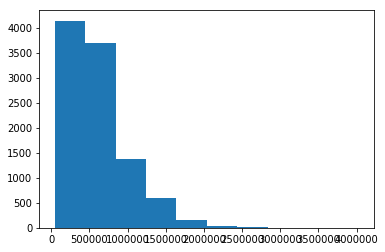

In [160]:
plt.hist(base_dataset["AMT_CREDIT"])

(array([  75.,  194.,  531., 1830., 1421., 2344., 2260., 1150.,  192.,
           3.]),
 array([10.714417 , 11.163929 , 11.6134405, 12.062952 , 12.512464 ,
        12.961975 , 13.411487 , 13.860998 , 14.31051  , 14.760021 ,
        15.209533 ], dtype=float32),
 <a list of 10 Patch objects>)

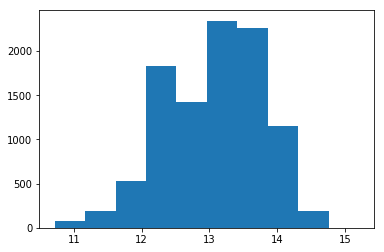

In [161]:
plt.hist(np.log(base_dataset["AMT_CREDIT"]))

### Model building and Validation

In [173]:
def model_validation(base_dataset,target_name,model,type_of_model):
    x=base_dataset.drop(target_name,axis=1)
    y=base_dataset[target_name]    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    if type_of_model=='regression':
        dt=model()
        y_train=np.log(y_train)
        y_test=np.log(y_test)
        dt.fit(X_train,y_train)
        dt.predict(X_test)       
        print(model,"MAE",mean_absolute_error(np.exp(y_test),np.exp(dt.predict(X_test))))
        print(model,"MSE",mean_squared_error(np.exp(y_test),np.exp(dt.predict(X_test))))
        
        
    else:
        dt=model()
        dt.fit(X_train,y_train)
        dt.predict(X_test)
        print(confusion_matrix(y_test,dt.predict(X_test)))
        tp,fp,fn,tn=confusion_matrix(y_test,dt.predict(X_test)).ravel()
        print(tp,fp,fn,tn)
        total=tp+fp+fn+tn
        AS=(tp+tn)/total
        sensitivity=tp/(tp+fn)
        precision=tp/(tp+fp)
        specificity=tn/(fp+tn)
        print("A.S",AS,sensitivity,precision,specificity)
        print(model,"A.S.",accuracy_score(y_test,dt.predict(X_test)))

In [142]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [174]:
regmodels=[DecisionTreeRegressor,BaggingRegressor,RandomForestRegressor]
for i in regmodels:
    model_validation(base_dataset,"AMT_CREDIT",i,'regression')

<class 'sklearn.tree.tree.DecisionTreeRegressor'> MAE 40728.241505522405
<class 'sklearn.tree.tree.DecisionTreeRegressor'> MSE 4779298951.239504
<class 'sklearn.ensemble.bagging.BaggingRegressor'> MAE 35985.04436429992
<class 'sklearn.ensemble.bagging.BaggingRegressor'> MSE 3030385529.49627
<class 'sklearn.ensemble.forest.RandomForestRegressor'> MAE 35895.60743282132
<class 'sklearn.ensemble.forest.RandomForestRegressor'> MSE 3044171573.068336


In [164]:
models=[DecisionTreeClassifier,RandomForestClassifier,BaggingClassifier]
for i in models:
    model_validation(base_dataset,'TARGET',i,'Classification')

[[2482  274]
 [ 212   32]]
2482 274 212 32
A.S 0.838 0.9213066072754269 0.9005805515239478 0.10457516339869281
<class 'sklearn.tree.tree.DecisionTreeClassifier'> A.S. 0.838
[[2746   10]
 [ 241    3]]
2746 10 241 3
A.S 0.9163333333333333 0.9193170405088718 0.9963715529753265 0.23076923076923078
<class 'sklearn.ensemble.forest.RandomForestClassifier'> A.S. 0.9163333333333333
[[2743   13]
 [ 242    2]]
2743 13 242 2
A.S 0.915 0.91892797319933 0.9952830188679245 0.13333333333333333
<class 'sklearn.ensemble.bagging.BaggingClassifier'> A.S. 0.915
